# Import all modules & format terminal

In [1]:
import pandas as pd
import numpy as np
from astropy.io import fits
import astropy
import math
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import colorcet as cc
from acstools import acszpt
from astropy.table import Table
%matplotlib qt


# w814 filter

## import data

In [2]:
image_data_w814_fireball, header_w814_fireball = fits.getdata("C:/Users/willi/Desktop/Hubble Data/candidates/2/h_v75_F814W_ivm_drz_cl_ver2.fits", header=True)

In [3]:
hdu_list = fits.open("C:/Users/willi/Desktop/Hubble Data/candidates/2/h_v75_F814W_ivm_drz_cl_ver2.fits")
image_data = hdu_list[1].data
hdu_list.info()

Filename: C:/Users/willi/Desktop/Hubble Data/candidates/2/h_v75_F814W_ivm_drz_cl_ver2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     503   ()      
  1  SCI           1 ImageHDU       179   (4225, 4300)   float32   
  2  WHT           1 ImageHDU        71   (4225, 4300)   float32   
  3  CTX           1 ImageHDU        71   (4225, 4300)   int32   


In [4]:
header_w814_fireball

 [astropy.io.fits.verify]



XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 4225 / Axis length                                    
NAXIS2  =                 4300 / Axis length                                    
PCOUNT  =                    0 / No 'random' parameters                         
GCOUNT  =                    1 / Only one group                                 
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
EXTNAME = 'SCI     '           / Extension name                                 
EXTVER  =                    1 / Extension version                              
DATE    = '2007-05-08T15:43:49' / Date FITS file was generated                  
IRAF-TLM= '21:07:50 (27/04/2009)' / Time of last modification                   
INHERIT =                   

In [5]:
image_data_w814_fireball

array([[-0.01948908, -0.06138653,  0.00473011, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01288939, -0.01733125,  0.01123847, ...,  0.        ,
         0.        ,  0.        ],
       [-0.02398009,  0.01929787,  0.00155553, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.00296626,
         0.00758985,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.00940749,
         0.02341227,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.01901661,
         0.02487982,  0.        ]], dtype=float32)

In [6]:
i = []
for char in image_data_w814_fireball:
    i.append(min(char))

In [7]:
i.sort()

In [8]:
i

[-0.3722971,
 -0.24163023,
 -0.23161036,
 -0.13265155,
 -0.10425752,
 -0.09599361,
 -0.091979854,
 -0.089358136,
 -0.080537245,
 -0.07926244,
 -0.07812617,
 -0.078026794,
 -0.07748177,
 -0.0769608,
 -0.07627331,
 -0.07536052,
 -0.07400083,
 -0.073893845,
 -0.0738487,
 -0.07257119,
 -0.07216241,
 -0.07211428,
 -0.07209525,
 -0.071236566,
 -0.07102862,
 -0.07041607,
 -0.07031894,
 -0.069757596,
 -0.06931946,
 -0.06905149,
 -0.06769053,
 -0.067678005,
 -0.06762384,
 -0.067470774,
 -0.06724015,
 -0.067139775,
 -0.06706896,
 -0.06690196,
 -0.0668299,
 -0.06678618,
 -0.06661229,
 -0.06658895,
 -0.06652847,
 -0.0661965,
 -0.06611068,
 -0.06588079,
 -0.0655101,
 -0.06549341,
 -0.06524679,
 -0.065234035,
 -0.065142475,
 -0.06474752,
 -0.06438322,
 -0.06401827,
 -0.06379417,
 -0.06354842,
 -0.063360505,
 -0.06334547,
 -0.06331195,
 -0.06329375,
 -0.063034825,
 -0.06302887,
 -0.062999286,
 -0.062466756,
 -0.062450435,
 -0.062211018,
 -0.062017005,
 -0.06173693,
 -0.0615923,
 -0.061386526,
 -0.061

In [9]:
image_data_w814_fireball = image_data_w814_fireball + 0.10425752

## data_manip

In [10]:
#display plot of data using a log scale
plt.imshow(image_data_w814_fireball, cmap= "Blues", interpolation = "nearest", norm=LogNorm())
plt.colorbar()

In [11]:
#query zeropoint
date = '2007-05-08'
detector = 'WFC'

In [12]:
q814 = acszpt.Query(date=date, detector=detector, filt = "F814W")                                    
filter_zpt814 = q814.fetch()

INFO:acszpt.Query:Checking inputs...
INFO:acszpt.Query:Submitting request to https://acszeropoints.stsci.edu/results_single/?date1=2007-05-08&detector=WFC&WFC_filter=F814W
INFO:acszpt.Query:Parsing the response and formatting the results...


In [13]:
print(filter_zpt814)

FILTER PHOTPLAM        PHOTFLAM         STmag  VEGAmag  ABmag 
       Angstrom erg / (Angstrom cm2 s) mag(ST)   mag   mag(AB)
------ -------- ---------------------- ------- ------- -------
 F814W   8045.3              7.137e-20  26.766  25.503   25.93


In [14]:
m_ab_w_814_fireball = (-2.5 * np.log10(image_data_w814_fireball)) + filter_zpt814['ABmag'][0].value

<ipython-input-14-4d50b3101ea2>:1: RuntimeWarning: divide by zero encountered in log10
  m_ab_w_814_fireball = (-2.5 * np.log10(image_data_w814_fireball)) + filter_zpt814['ABmag'][0].value
<ipython-input-14-4d50b3101ea2>:1: RuntimeWarning: invalid value encountered in log10
  m_ab_w_814_fireball = (-2.5 * np.log10(image_data_w814_fireball)) + filter_zpt814['ABmag'][0].value


In [15]:
m_ab_w_814_fireball_array = np.where(m_ab_w_814_fireball == np.inf, 0, m_ab_w_814_fireball)
#m_ab_w_814_fireball_array = np.nan_to_num(m_ab_w_814_fireball)

In [16]:
m_ab_w_814_fireball_array[1,1]

28.582123

In [17]:
plt.imshow(m_ab_w_814_fireball_array, cmap= "Blues", interpolation = "nearest")
plt.clim(21,32)# for wide
#plt.clim(25.5,30.5)#for core
plt.colorbar()

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
from astropy.convolution import convolve
from astropy.convolution import convolve_fft

kernel = Gaussian2DKernel(x_stddev=3)
w814_conv = convolve_fft(m_ab_w_814_fireball_array, kernel, allow_huge=True)

In [19]:
plt.imshow(m_ab_w_814_fireball_array, vmin=26, vmax=29, cmap= "Blues", interpolation = "nearest")
plt.contour(w814_conv, levels = [27.5, 27.6, 27.7, 27.8, 27.9,28, 28.1, 28.2, 28.3], cmap = "Reds", linewidths =3)

plt.colorbar()



In [20]:
plt.imshow(m_ab_w_814_fireball_array, vmin=26, vmax=29, cmap= "Blues", interpolation = "nearest")
plt.colorbar()


In [21]:
plt.imshow(w814_conv, vmin=27, vmax=29, cmap= "Blues", interpolation = "nearest")
plt.colorbar()
plt.xlim(2600, 3600)
plt.ylim(3200, 4200)

(3200.0, 4200.0)

## apeture data

In [22]:
from photutils.aperture import CircularAperture
from photutils.aperture import aperture_photometry

In [23]:
#3-arcsecond apurture
#hubble is at 0.04 arcseconds per pixel
#so the diameter of the apuruture needs to be 75 pixels wide, or 38 pixel radius
#test double radius becuase of drizzle
#3066, 3652

In [24]:
positions = [(3066., 3652.)]
aperture = CircularAperture(positions, r=75.)

background_positions = [(3000., 2036.)]
bacground_apeture = CircularAperture(background_positions, r=2.)

In [25]:
plt.imshow(m_ab_w_814_fireball_array, cmap= "Blues", interpolation = "nearest")
plt.clim(21,32)# for wide
#plt.clim(25.5,30.5)#for core
plt.colorbar()
aperture.plot(color='white', lw=2,label='Photometry aperture')
bacground_apeture.plot(color='red', lw=2,label='Background aperture')

In [26]:
phot_table = aperture_photometry(image_data_w814_fireball, aperture)
background_table = aperture_photometry(image_data_w814_fireball, bacground_apeture)

In [27]:
print(phot_table)
print("------------------------------------")
print(background_table)

 id xcenter ycenter    aperture_sum  
      pix     pix                    
--- ------- ------- -----------------
  1  3066.0  3652.0 3627.120375520468
------------------------------------
 id xcenter ycenter    aperture_sum   
      pix     pix                     
--- ------- ------- ------------------
  1  3000.0  2036.0 1.4181913630688272


In [28]:
bkg_mean = background_table['aperture_sum'] / bacground_apeture.area

In [29]:
phot = phot_table['aperture_sum']

In [30]:
phot2 = 120607.24243693583 - 2*54791.63149645273

In [31]:
phot

3627.120375520468


In [32]:
ap_mag1 = (-2.5 * np.log10(phot/0.972 )) + filter_zpt814['ABmag'][0].value

In [33]:
ap_mag1

17.00026073975777


In [34]:
ap_mag1 - 16.740

0.2602607397577721


# w475 data

## import data

In [35]:
image_data_w475_fireball, header_w475_fireball = fits.getdata("C:/Users/willi/Desktop/Hubble Data/candidates/2/h_v75_F475W_ivm_drz_cl_ver2.fits", header=True)

In [36]:
header_w475_fireball

 [astropy.io.fits.verify]



XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 4225 / Axis length                                    
NAXIS2  =                 4300 / Axis length                                    
PCOUNT  =                    0 / No 'random' parameters                         
GCOUNT  =                    1 / Only one group                                 
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
EXTNAME = 'SCI     '           / Extension name                                 
EXTVER  =                    1 / Extension version                              
IRAF-TLM= '21:03:35 (27/04/2009)' / Time of last modification                   
INHERIT =                    T / Inherits global header                         
DATE    = '2009-02-16T16:34:

In [37]:
image_data_w475_fireball

array([[-0.00313886,  0.01584025,  0.00497155, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00167215,  0.0115015 ,  0.00435608, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00517615,  0.00331243,  0.00358055, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.0148873 ,
         0.00995372,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.01273204,
         0.00203181,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.01217979,
        -0.00061491,  0.        ]], dtype=float32)

In [38]:
f = []
for char in image_data_w475_fireball:
    f.append(min(char))

In [39]:
f.sort()

In [40]:
f

[-0.32320216,
 -0.2763098,
 -0.18330823,
 -0.103662595,
 -0.083295144,
 -0.0784939,
 -0.07518539,
 -0.060384504,
 -0.059961643,
 -0.05487316,
 -0.047836646,
 -0.046713635,
 -0.04652455,
 -0.04611057,
 -0.042741094,
 -0.04263821,
 -0.041788753,
 -0.04145403,
 -0.040932953,
 -0.039374545,
 -0.039028678,
 -0.038636725,
 -0.038360145,
 -0.038253624,
 -0.03794669,
 -0.037888497,
 -0.03780338,
 -0.03703286,
 -0.036774132,
 -0.036660492,
 -0.03642335,
 -0.036369707,
 -0.03636368,
 -0.036191884,
 -0.036025796,
 -0.036012035,
 -0.035678875,
 -0.03515897,
 -0.034877535,
 -0.034497153,
 -0.034460302,
 -0.034365192,
 -0.03413995,
 -0.033833727,
 -0.033700947,
 -0.033578232,
 -0.033539504,
 -0.033535138,
 -0.033488665,
 -0.03347847,
 -0.033475272,
 -0.033394057,
 -0.033372477,
 -0.033251543,
 -0.03318545,
 -0.033170693,
 -0.03312423,
 -0.03305354,
 -0.033004858,
 -0.032877788,
 -0.032724254,
 -0.032690827,
 -0.03268378,
 -0.032627873,
 -0.03253979,
 -0.032523427,
 -0.032500632,
 -0.03248298,
 -0.03

In [41]:
image_data_w475_fireball = image_data_w475_fireball+ 0.083295144

## Data_manip

In [42]:
#display plot of data using a log scale
plt.imshow(image_data_w475_fireball, cmap= "Blues", interpolation = "nearest", norm=LogNorm())
plt.colorbar()

In [43]:
#query zeropoint
date = '2007-05-08'
detector = 'WFC'

In [44]:
q475 = acszpt.Query(date=date, detector=detector, filt = "F475W")                                    
filter_zpt475 = q475.fetch()

INFO:acszpt.Query:Checking inputs...
INFO:acszpt.Query:Submitting request to https://acszeropoints.stsci.edu/results_single/?date1=2007-05-08&detector=WFC&WFC_filter=F475W
INFO:acszpt.Query:Parsing the response and formatting the results...


In [45]:
print(filter_zpt475)

FILTER PHOTPLAM        PHOTFLAM         STmag  VEGAmag  ABmag 
       Angstrom erg / (Angstrom cm2 s) mag(ST)   mag   mag(AB)
------ -------- ---------------------- ------- ------- -------
 F475W   4747.5              1.852e-19  25.731  26.133  26.041


In [46]:
m_ab_w_475_fireball = (-2.5 * np.log10(image_data_w475_fireball)) + filter_zpt475['ABmag'][0].value

<ipython-input-46-1048ee3242a9>:1: RuntimeWarning: divide by zero encountered in log10
  m_ab_w_475_fireball = (-2.5 * np.log10(image_data_w475_fireball)) + filter_zpt475['ABmag'][0].value
<ipython-input-46-1048ee3242a9>:1: RuntimeWarning: invalid value encountered in log10
  m_ab_w_475_fireball = (-2.5 * np.log10(image_data_w475_fireball)) + filter_zpt475['ABmag'][0].value


In [47]:
m_ab_w_475_fireball_array = np.where(m_ab_w_475_fireball == np.inf, 0, m_ab_w_475_fireball)

In [48]:
plt.imshow(m_ab_w_475_fireball_array, cmap= "Blues", interpolation = "nearest")
plt.clim(26.5,29)# for wide
#plt.clim(25.5,30.5)#for core
plt.colorbar()

In [49]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
from astropy.convolution import convolve
from astropy.convolution import convolve_fft

kernel = Gaussian2DKernel(x_stddev=3)
w475_conv = convolve_fft(m_ab_w_475_fireball_array, kernel, allow_huge=True)

In [50]:
plt.imshow(m_ab_w_475_fireball_array, vmin=27.0, vmax=29, cmap= "Blues", interpolation = "nearest")
plt.contour(w475_conv, levels = [27.0, 27.4, 27.6, 27.8, 28, 28.2, 28.4], linewidths =3)

plt.colorbar()



In [51]:
plt.imshow(m_ab_w_475_fireball_array, vmin=26.5, vmax=29, cmap= "Blues", interpolation = "nearest")
plt.colorbar()


In [52]:
plt.imshow(w475_conv, vmin=26.5, vmax=29, cmap= "Blues", interpolation = "nearest")
plt.colorbar()


## Aputure photometry

In [53]:
from photutils.aperture import CircularAperture
from photutils.aperture import aperture_photometry

In [54]:
positions = [(3066., 3652.)]
aperture = CircularAperture(positions, r=75.)

background_positions = [(3000., 2036.)]
bacground_apeture = CircularAperture(background_positions, r=2.)

In [55]:
plt.imshow(m_ab_w_475_fireball_array, cmap= "Blues", interpolation = "nearest")
plt.clim(21,32)# for wide
#plt.clim(25.5,30.5)#for core
plt.colorbar()
aperture.plot(color='white', lw=2,label='Photometry aperture')
bacground_apeture.plot(color='red', lw=2,label='Background aperture')

In [56]:
phot_table2 = aperture_photometry(image_data_w475_fireball, aperture)
background_table2 = aperture_photometry(image_data_w475_fireball, bacground_apeture)

In [57]:
bkg_mean2 = background_table2['aperture_sum'] / bacground_apeture.area

In [58]:
phot2 = phot_table2['aperture_sum']

In [59]:
ap_mag2 = (-2.5 * np.log10(phot2/0.979 )) + filter_zpt475['ABmag'][0].value

In [60]:
ap_mag2

17.390431128235456


In [61]:
ap_mag2 - 17.133

0.25743112823545644


# subtraction

In [62]:
ap_mag2- ap_mag1

0.39017038847768504


In [63]:
(ap_mag2- ap_mag1) - 0.3930

-0.0028296115223149787


In [64]:
17.133- 16.740

0.3930000000000007

In [65]:
subtractmap = m_ab_w_475_fireball_array - m_ab_w_814_fireball_array
astropy_conv = w475_conv - w814_conv

In [66]:
subctract_pos = [(3066., 3652.)]
subtract_ap = CircularAperture(subctract_pos, r=75.)

In [67]:
subtract_sum = aperture_photometry(subtractmap, subtract_ap)

In [68]:
subtract_sum

id,xcenter,ycenter,aperture_sum
,pix,pix,
int32,float64,float64,float64
1,3066.0,3652.0,6849.207414790636


In [69]:
6849.207414790636/subtract_ap.area

0.38758585469354356

## Subtraction map

In [81]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
from astropy.convolution import convolve
from astropy.convolution import convolve_fft





#plt.imshow(astropy_conv, vmin=-.1, vmax=1.1, cmap= "Blues", interpolation = "nearest")
plt.imshow(subtractmap, vmin=-.1, vmax=1.1, cmap= "Blues", interpolation = "nearest")
#plt.contour(astropy_conv, levels = [.1, .15, .2, .25, .3, .35, .4, .45, .55],  cmap= "Reds", linewidths =3)
plt.colorbar()





In [82]:
#close
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
from astropy.convolution import convolve
from astropy.convolution import convolve_fft





#plt.imshow(astropy_conv, vmin=-.1, vmax=1.1, cmap= "Blues", interpolation = "nearest")
plt.imshow(subtractmap, vmin=-.1, vmax=1.1, cmap= "Blues", interpolation = "nearest")
plt.contour(astropy_conv, levels = [.26, .27, .28, .29, .3, .31, .32, .33, .34, .35], cmap = "gist_stern", linewidths =3)
plt.colorbar()
plt.xlim(2600, 3600)
plt.ylim(3200, 4200)

(3200.0, 4200.0)

In [72]:
plt.imshow(astropy_conv, vmin=-.1, vmax=1.1, cmap= "Blues", interpolation = "nearest")
plt.colorbar()
plt.xlim(2600, 3600)
plt.ylim(3200, 4200)

(3200.0, 4200.0)

In [73]:
from PIL import Image
vertical_img = np.flipud(subtractmap)

In [74]:
plt.imshow(subtractmap, vmin=-.6, vmax=.5, cmap= "Blues", interpolation = "nearest")
plt.colorbar()


In [75]:
plt.imshow(vertical_img, vmin=-.6, vmax=.5, cmap= "Blues", interpolation = "nearest")
plt.colorbar()

In [76]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import Gaussian2DKernel
from scipy.signal import convolve as scipy_convolve
from astropy.convolution import convolve
from astropy.convolution import convolve_fft

kernel = Gaussian2DKernel(x_stddev=2)
astropy_conv = convolve(subtractmap, kernel)

## APLPY

In [1]:
import aplpy

 [astropy.io.fits.verify]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]


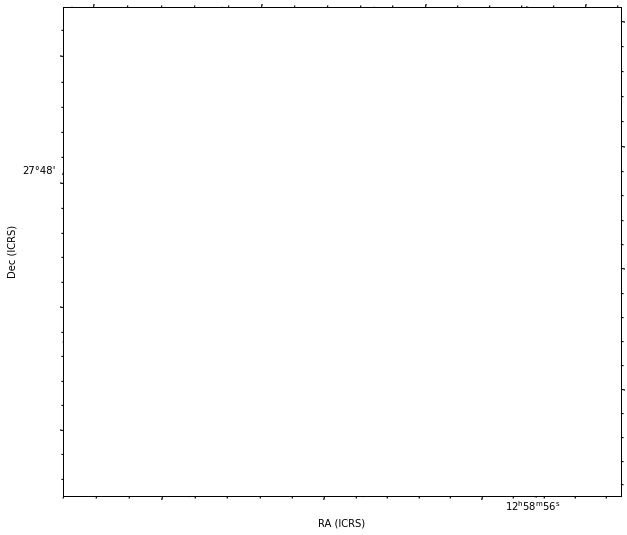

In [3]:
fig = aplpy.FITSFigure("C:/Users/willi/Desktop/Hubble Data/candidates/2/h_v75_F475W_ivm_drz_cl_ver2.fits")

In [4]:
fig.show_grayscale()

INFO: Auto-setting vmin to -2.567e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.215e-01 [aplpy.core]


In [80]:
fig.show_contour("C:/Users/willi/Desktop/Hubble Data/candidates/2/h_v75_F475W_ivm_drz_cl_ver2.fits", colors='red')

 [astropy.io.fits.verify]

INFO:astropy:
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                
the 

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
